In [27]:
# Victor Z and Leo Gonzalez
# UW-Madison, 2024
# npv comparison

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ecdf

In [28]:
# compare investment strategies
np.random.seed(0)

N = 1000    # number of scenarios
ir = 0.05   # interest rate

In [29]:
# evaluate investment 1
C1 = 25
ROI1 = np.random.normal(0.5, 0.1, N)
NPV1 = np.zeros(N)

for i, roi in enumerate(ROI1):
    NPV1[i] = C1-roi*C1*(1-(1+ir)**(-10))/ir


# evaluate investment 2
C2 = 50
ROI2 = np.random.normal(0.4, 0.2, N)
NPV2 = np.zeros(N)

for i, roi in enumerate(ROI1):
    NPV2[i] = C2 - roi*C2*(1-(1+ir)**(-10))/ir

(0.0, 1.01)

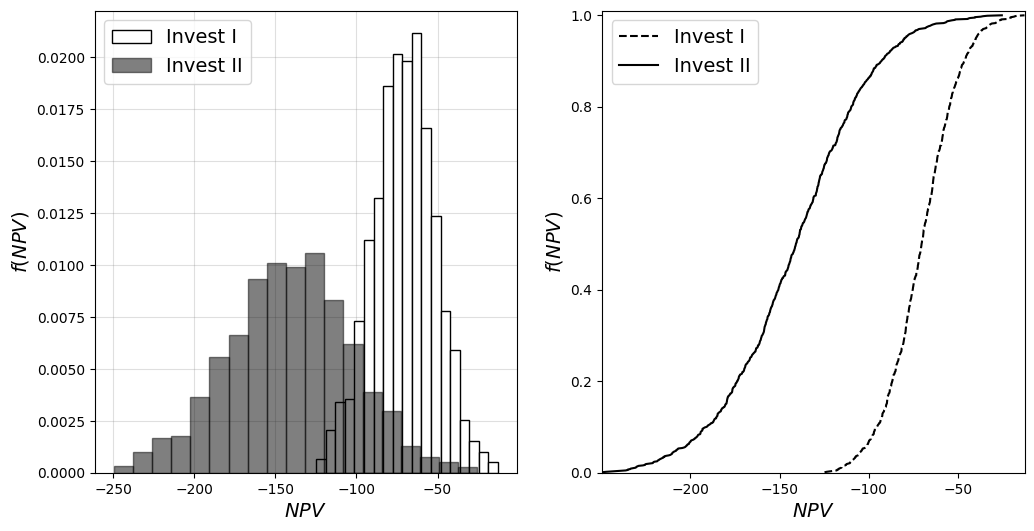

In [30]:
# lets compare pdfs of NPV
nb = 20

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = ([12, 6]))
ax1.grid(color = 'gray', axis = 'both', alpha = 0.25)
ax1.set_axisbelow(True)
ax1.hist(NPV1, np.linspace(np.min(NPV1), np.max(NPV1), nb),
         color = 'w', edgecolor = 'k', linewidth = 1, density = True, label = 'Invest I')
ax1.hist(NPV2, np.linspace(np.min(NPV2), np.max(NPV2), nb),
         color = 'k', alpha = 0.5, edgecolor = 'k', linewidth = 1, density = True, label = 'Invest II')
ax1.set_xlabel(r'$NPV$', fontsize = 14)
ax1.set_ylabel(r'$f(NPV)$', fontsize = 14)
ax1.legend(loc = 'upper left', fontsize = 14)

# lets compare cdfs of NPV
res1 = ecdf(NPV1)
F1 = res1.cdf.probabilities
t = res1.cdf.quantiles
ax2.plot(t, F1, 'k--', linewidth = 1.5, label = 'Invest I')

res2 = ecdf(NPV2)
F2 = res2.cdf.probabilities
t = res2.cdf.quantiles
ax2.plot(t, F2, 'k-', linewidth = 1.5, label = 'Invest II')

ax2.set_xlabel(r'$NPV$', fontsize = 14)
ax2.set_ylabel(r'$f(NPV)$', fontsize = 14)
ax2.legend(loc = 'upper left', fontsize = 14)
ax2.set_xlim(min(np.min(NPV1), np.min(NPV2)), max(np.max(NPV1), np.max(NPV2)))
ax2.set_ylim(0, 1.01)

In [34]:
## analyze summarizing statistics

# get expected value
EV1 = np.mean(NPV1)
EV2 = np.mean(NPV2)

print("EV1:", EV1)
print("EV2:", EV2)

# get SD
SD1 = np.std(NPV1, ddof = 1)
SD2 = np.std(NPV2, ddof = 1)

print("SD1:", SD1)
print("SD2:", SD2)

# get worse case
WC1 = np.max(NPV1)
WC2 = np.max(NPV2)

print("WC1:", WC1)
print("WC2:", WC2)

# get best case
BC1 = np.min(NPV1)
BC2 = np.min(NPV2)

print("BC1:", BC1)
print("BC2:", BC2)

# VaR (quantile)
Q1 = np.quantile(NPV1,0.9)
Q2 = np.quantile(NPV2,0.9)

print("Q1:", Q1)
print("Q2:", Q2)

# CVaR
loc = NPV1 >= Q1
CVaR1 = np.mean(NPV1[loc])

loc = NPV2 >= Q2
CVaR2 = np.mean(NPV2[loc])

print("CVaR1:", CVaR1)
print("CVaR2:", CVaR2)

# probability of loss
loc = NPV1 > 0
Prob1 = 100*np.sum(loc)/N

loc = NPV2 > 0
Prob2 = 100*np.sum(loc)/N

# probability of gain
loc = NPV1 <= -100
Prob1 = 100*np.sum(loc)/N

loc = NPV2 <= -100
Prob2 = 100*np.sum(loc)/N

EV1: -70.64803586729288
EV2: -141.29607173458575
SD1: 19.06355520563503
SD2: 38.12711041127006
WC1: -12.717913550954378
WC2: -25.435827101908757
BC1: -124.78920852972323
BC2: -249.57841705944645
Q1: -46.44260493556184
Q2: -92.88520987112368
CVaR1: -37.39209112166003
CVaR2: -74.78418224332006


In [32]:
## assuming deterministic

# evaluate investment 1
C1 = 25
ROI1 = 0.5
NPV1det = C1-ROI1*C1*(1-(1+ir)**(-10))/ir

# evaluate investment 2
C2 = 50
ROI2 = 0.4
NPV2det = C2-ROI2*C2*(1-(1+ir)**(-10))/ir

(0.0, 100.0)

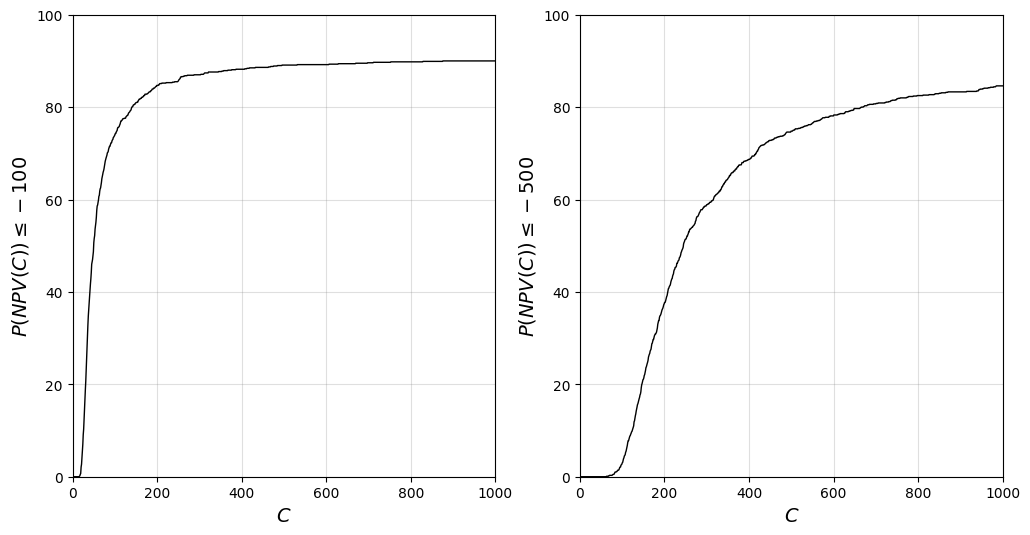

In [33]:
## determine optimal C such that P(NPV<=t) is high

t = -100
C = np.linspace(0, 1000, 1000)
PNPV = np.zeros(len(C))
ROI = np.random.normal(0.4, 0.2, N)
NPV = np.zeros(N)

for k, c in enumerate(C):
    for i, roi in enumerate(ROI):
        NPV[i] = c-roi*c*(1-(1+ir)**(-10))/ir

    # probability of loss
    loc = NPV <= t
    PNPV[k] = 100*np.sum(loc)/N;

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = ([12, 6]))
ax1.grid(color = 'gray', axis = 'both', alpha = 0.25)
ax1.set_axisbelow(True)
ax1.plot(C, PNPV, 'k-', linewidth = 1)
ax1.set_xlabel(r'$C$', fontsize = 14)
ax1.set_ylabel(r'$P(NPV(C))\leq-100$', fontsize = 14)
ax1.set_xlim(C[0], C[-1])
ax1.set_ylim(0, 100)


## determine optimal C such that P(NPV<=t) is high

t = -500
C = np.linspace(0, 1000, 1000)
PNPV = np.zeros(len(C))
ROI = np.random.normal(0.4, 0.2, N)
NPV = np.zeros(N)

for k, c in enumerate(C):
    for i, roi in enumerate(ROI):
        NPV[i] = c-roi*c*(1-(1+ir)**(-10))/ir

    # probability of loss
    loc = NPV <= t
    PNPV[k] = 100*np.sum(loc)/N;

ax2.grid(color = 'gray', axis = 'both', alpha = 0.25)
ax2.set_axisbelow(True)
ax2.plot(C, PNPV, 'k-', linewidth = 1)
ax2.set_xlabel(r'$C$', fontsize = 14)
ax2.set_ylabel(r'$P(NPV(C))\leq-500$', fontsize = 14)
ax2.set_xlim(C[0], C[-1])
ax2.set_ylim(0, 100)